[View in Colaboratory](https://colab.research.google.com/github/mayankprhr/fashionmnist2/blob/master/Fashion_mnist_v2.ipynb)

**This is the first test in my Google Colab for Researcher**

So the text part works just the way it should. The question is how to install new packages
Lets keep exploring
First we get rid of the preinstalled tensorflow and get the GPU varient of it.

In [0]:
!pip install tensorflow-gpu

So thats how you can install keras and tensorflow and you need not do it again and again repeatedly
The next point comes from using this script. Now i have some training script 

But first lets get some datasets

for that we will try [pydataset](https://github.com/iamaziz/PyDataset) or Quandl shoudl suffice

And also we would need some image datasets which keras will give us :3 ....



In [0]:
import tensorflow as tf

In [0]:
import keras

In [0]:
!pip install matplotlib

In [0]:
!pip install numpy

In [0]:
!pip install quandl

Now we will try an MNIST dataset analysis shall we ....
I will just copy paste my own code for this testing purpose

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jan 17 06:43:45 2018
@author: Rajat
"""

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist as dataset
from keras.models import Sequential
from keras.layers import Dense, Dropout , Activation,Flatten,Convolution2D, MaxPooling2D ,AveragePooling2D
from keras.utils import np_utils



def load_preprocess_image_data(data):
    (X_train , Y_train),(X_test , Y_test) = data
    # making data of type (m , h, w , c)
    X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1) 
    X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1) 
    # making data normalize
    X_norm_train = X_train.astype('float32')/255
    X_norm_test = X_test.astype('float32')/255
    # making classes having one hot encoding
    n_class = np.unique(Y_train).shape[0]
    Y_encoded_train = np_utils.to_categorical(Y_train,n_class)
    Y_encoded_test = np_utils.to_categorical(Y_test,n_class)
    return ((X_norm_train , Y_encoded_train),(X_norm_test,Y_encoded_test))

def detection_model(shape):
    # Conv2d(3,3,c = 64) => Conv2d(4,4,c=128) => Conv2d(2,2,256) => AveragePool(2,2) =>dropoout=> faltten=>Dense=>dropout
    # => dense => dense =>output
    model = Sequential()
    model.add(Convolution2D(32 , kernel_size=(3,3), strides=(1,1) , padding='same' , activation='relu', input_shape=shape))
    model.add(Convolution2D(64 , kernel_size=(4,4), strides=(1,1) , padding='same' , activation='relu', input_shape=shape))
    model.add(Convolution2D(128 , kernel_size=(4,4), strides=(1,1) , padding='valid' , activation='relu', input_shape=shape))
    model.add(AveragePooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

def save_model(model,name):
     model_json = model.to_json()
     with open(name+".json", "w") as json_file:
         json_file.write(model_json)
     model.save_weights(name+".h5")
    
def load_model_weights(name):
    from keras.models import model_from_json
    json_file = open(name+'.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights(name+".h5")
    loaded_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return loaded_model
    
def verify_entry(X_test,Y_test,model , n):
    print("Actual Class is:",np.argmax(Y_test[n:n+1]))
    print("Predicted Class is: ",np.argmax(model.predict(X_test[n:n+1])))
    plt.imshow(X_test[n].reshape(X_test.shape[1],X_test.shape[2]))


So let us verify whether we are using a GPU or not

In [0]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

Woaaw TESLA K80 we are in for the show gentelmen though the compute capability makes me question.
Here is section of [quora](https://www.quora.com/What-is-new-in-CUDA-compute-capability-3-7) on it.
Also i think it is the older maxwell or kepler architecture GPU that are present here. Well still the performance should be good enough
One more if it helps [comparison of kepler accelerators](https://www.microway.com/knowledge-center-articles/in-depth-comparison-of-nvidia-tesla-kepler-gpu-accelerators/)

Ok enough of chit chat lets get to computing


In [0]:
(X_train , Y_train),(X_test , Y_test) = load_preprocess_image_data(dataset.load_data())
model = detection_model(X_train[0].shape)
model.summary()
model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=1)

verify_entry(X_test,Y_test,model , 1)


[0.23298748527765273, 0.9254]
Actual Class is: 2
Predicted Class is:  2


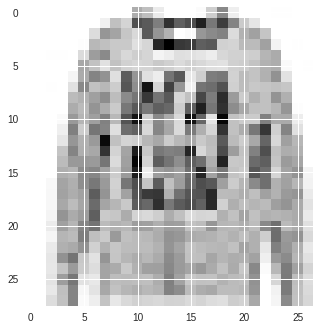

In [0]:
print(score)
verify_entry(X_test,Y_test,model , 500)

Hmm ! that works.
Now to save the model and download them

In [0]:
save_model(model,"fashion_mnist")

In [0]:
!ls

datalab  fashion_mnist.h5  fashion_mnist.json


In [0]:
from google.colab import files
files.download('fashion_mnist.h5')

And thats it. The standard way of training a model and then downloading it off the notebook's VM.
For more io operation from system or the Google Drive of your account you can refer to Googles own excellent documentation
[io docs](https://colab.research.google.com/notebook#fileId=/v2/external/notebooks/io.ipynb&scrollTo=p2E4EKhCWEC5)